# Data Exploration


In [2]:
# %load Model_Pycharm.py
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

df_test_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/test.csv")
df_train_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/train.csv")
#df_train_original.info()
df_test_original.info()
df_train_original.info()
df_test = df_test_original.copy()
df_train = df_train_original.copy()

del df_train['Cabin']
df_train=df_train.dropna(subset=['Age', 'Embarked'])
df_train.info()
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())
#print(women.shape)
#print(sum(women))
#print(len(women))
#print(women)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [3]:
df_test_original.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_test_original.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df_train_original['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

#### number of NAN values in df_train

In [6]:
100*df_train_original.isna().sum()/df_train_original.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
100*df_test_original.isna().sum()/df_test_original.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

MISSING VALS IN THE TRAINING SET:
Age         177
Cabin       687
Embarked      2
dtype: int64


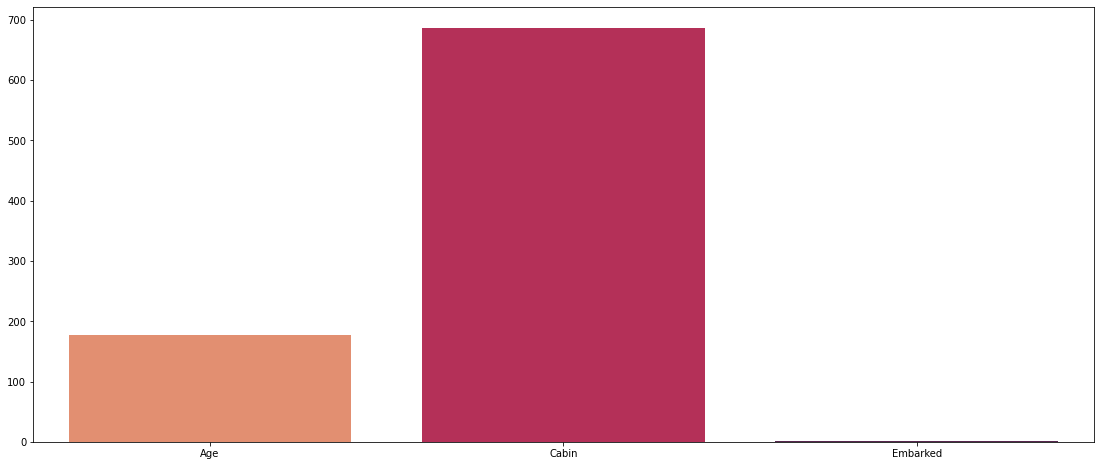

['Age', 'Cabin', 'Embarked']
Age         177
Cabin       687
Embarked      2
dtype: int64


In [8]:
nan_cols = df_train_original.columns[df_train_original.isna().any()].tolist()
plt.figure(figsize=(19,8))
nan_count_cols = df_train_original[nan_cols].isna().sum()
print("MISSING VALS IN THE TRAINING SET:")
print(colored(nan_count_cols, "green"))
sns.barplot(y=nan_count_cols, x=nan_cols, palette='rocket_r')
plt.show()
print(nan_cols)
print(nan_count_cols )

#### number of NAN values in df_test

MISSING VALS IN THE TRAINING SET:
Age       86
Fare       1
Cabin    327
dtype: int64


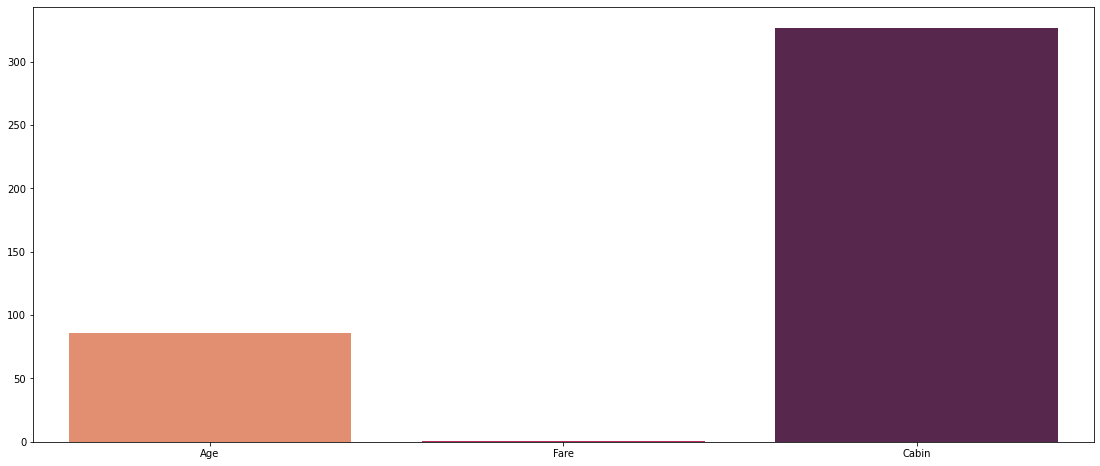

['Age', 'Fare', 'Cabin']


In [9]:
nan_cols = df_test_original.columns[df_test_original.isna().any()].tolist()
plt.figure(figsize=(19,8))
nan_count_cols = df_test_original[nan_cols].isna().sum()
print("MISSING VALS IN THE TRAINING SET:")
print(colored(nan_count_cols, "green"))
sns.barplot(y=nan_count_cols, x=nan_cols, palette='rocket_r')
plt.show()
print(nan_cols)

In [10]:
women = df_train_original.loc[df_train_original.Sex == 'female']["Survived"]
male = df_train_original.loc[df_train_original.Sex == 'male']["Survived"]

rate_women = sum(women)/len(women)
rate_male = sum(male)/len(male)
print(rate_male*100, len(male), rate_women*100, len(women))

18.890814558058924 577 74.20382165605095 314


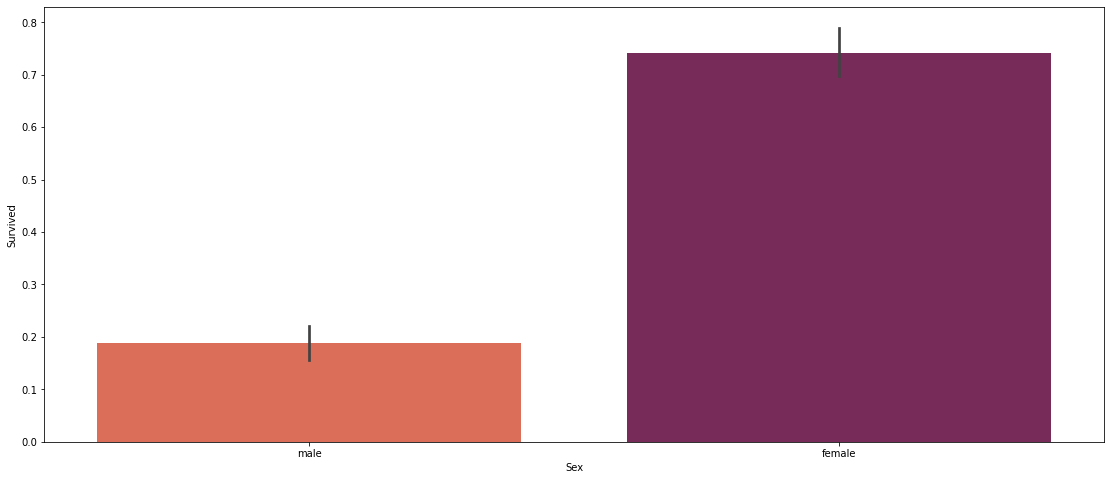

['Age', 'Fare', 'Cabin']


In [11]:
#sur_col = ['Sex', 'Survived']
#sur_col_count = df_train_original[sur_col].sum()
#print(sur_col)
#print(sur_col_count)

plt.figure(figsize=(19,8))

sns.barplot(y=df_train_original['Survived'], x=df_train_original['Sex'], palette='rocket_r')
plt.show()
print(nan_cols)

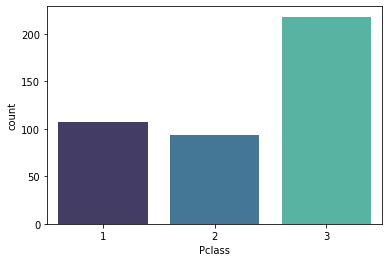

PASSENGER CLASS COUNTS:

First Class Passengers: 216 

Second Class Passengers: 184 

Third Class Passengers: 491 



In [12]:
sns.countplot(x='Pclass', data=df_test_original, palette='mako')
plt.show()
print(colored("PASSENGER CLASS COUNTS:\n", 'magenta', attrs=['bold', 'underline']))
print(colored(f"First Class Passengers: {df_train_original[df_train_original['Pclass']==1].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Second Class Passengers: {df_train_original[df_train_original['Pclass']==2].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Third Class Passengers: {df_train_original[df_train_original['Pclass']==3].count()[0]}", "cyan", attrs=['bold']),'\n')

In [13]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


**Survival Rate based on each class**

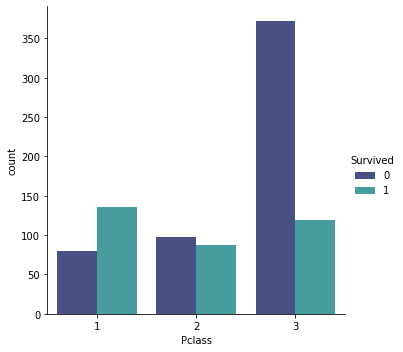

In [15]:
sns.catplot(x="Pclass",  kind="count", hue='Survived', data=df_train_original, palette='mako')

In [16]:
SURVIVED_CLASS_LIST = df_train_original.value_counts(["Pclass", "Survived"], sort=False).to_numpy()

In [17]:
SURVIVED_CLASS_LIST

array([ 80, 136,  97,  87, 372, 119])

<AxesSubplot:xlabel='Sex', ylabel='count'>

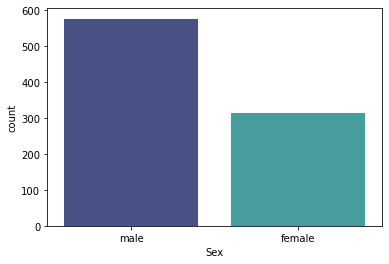

In [18]:
sns.countplot(x="Sex", data= df_train_original, palette="mako")

In [42]:
df_train_original.value_counts(["Sex"], sort=False)

Sex   
female    314
male      577
dtype: int64

In [47]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

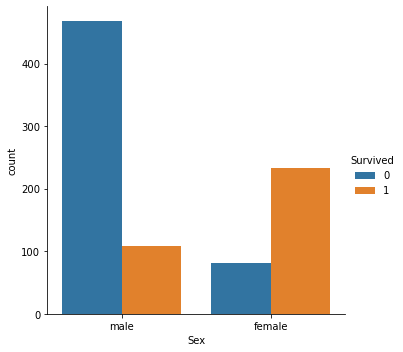

In [50]:
sns.catplot(x="Sex", kind="count", hue="Survived", data=df_train_original)

In [51]:
df_train_original.value_counts(["Sex", "Survived"], sort=False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [ ]:
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())
        

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5]


In [ ]:
print (df_train['Fare'].mean(),df_train['Fare'].max(),
df_train['Fare'].min())

34.567251404494385 512.3292 0.0


In [ ]:
y = df_train["Survived"]
print(y.shape)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
print(X.shape)
X_test = pd.get_dummies(df_test[features])
print(X_test.shape)
model = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions.shape)
print(df_test.shape)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_prediction_Cesar.csv', index=False)
print("Your submission was successfully saved!")

(712,)
(712, 5)
(418, 5)
(418,)
(418, 11)
Your submission was successfully saved!
